In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set up plotting style and ignore warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [5]:
# Load the dataset
file_path = 'C:\\Users\\user\\Downloads\\ObservationData_hnbuyob.csv'
df = pd.read_csv(file_path)

# Basic inspection
print("Dataset loaded successfully!")
print(f"Data shape: {df.shape}")  # Should show (426, 4)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Dataset loaded successfully!
Data shape: (426, 4)

First 5 rows:
  indicator Unit    Date       Value
0    Volume  NaN    2016  11719847.0
1    Volume  NaN  2016Q1   2847438.0
2    Volume  NaN  2016Q2   2884367.0
3    Volume  NaN  2016Q3   3008641.0
4    Volume  NaN  2016Q4   2979401.0

Column names:
['indicator', 'Unit', 'Date', 'Value']

Data types:
indicator     object
Unit          object
Date          object
Value        float64
dtype: object


In [6]:
# Function to convert different date formats
def convert_date(date_str):
    try:
        if pd.isna(date_str):
            return pd.NaT
        date_str = str(date_str).strip()
        
        if 'Q' in date_str:  # Quarterly data (e.g., 2016Q1)
            year, quarter = date_str.split('Q')
            month = (int(quarter) - 1) * 3 + 1
            return datetime(int(year), month, 1)
        elif 'M' in date_str:  # Monthly data (e.g., 2016M1)
            year, month = date_str.split('M')
            return datetime(int(year), int(month), 1)
        else:  # Annual data (e.g., 2016)
            return datetime(int(date_str), 1, 1)
    except Exception as e:
        print(f"Error converting date: {date_str}, Error: {e}")
        return pd.NaT

# Apply date conversion
df['Date_clean'] = df['Date'].apply(convert_date)

# Check for conversion errors
print(f"Original date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Cleaned date range: {df['Date_clean'].min()} to {df['Date_clean'].max()}")
print(f"Missing dates: {df['Date_clean'].isna().sum()}")

# Create year and quarter columns for analysis
df['Year'] = df['Date_clean'].dt.year
df['Quarter'] = df['Date_clean'].dt.quarter
df['Month'] = df['Date_clean'].dt.month

print("✓ Date conversion completed!")

Original date range: 2016 to 2016Q4
Cleaned date range: 2016-01-01 00:00:00 to 2016-12-01 00:00:00
Missing dates: 0
✓ Date conversion completed!


In [7]:
# Explore what indicators we have
print("Unique Indicators in the dataset:")
print(df['indicator'].value_counts())
print("\n" + "="*50)

print("\nUnique Units in the dataset:")
print(df['Unit'].value_counts())
print("\n" + "="*50)

print("\nDate formats present:")
print(df['Date'].value_counts().head(10))

Unique Indicators in the dataset:
indicator
Volume                                                     119
Value (N'Billion)                                          119
Contract Staff                                              12
Junior Staff                                                12
Senior Staff                                                12
Executive Staff                                             12
Oil & Gas                                                    8
Power and Energy                                             8
Total Banks                                                  4
Merchant Banks                                               4
Other Investments - Other claims                             4
Other Investments - Loans                                    4
Portfolio Investment - Money market instruments              4
Portfolio Investment - Equity                                4
Foreign Direct Investment - Equity                           4
Total      

In [8]:
# Statistical summary by indicator
print("Statistical Summary by Indicator:")
indicators_summary = df.groupby('indicator').agg({
    'Value': ['count', 'mean', 'std', 'min', 'max', 'median']
}).round(2)

print(indicators_summary)

print("\nMissing Values Analysis:")
print(df.isnull().sum())

Statistical Summary by Indicator:
                                                   Value                \
                                                   count          mean   
indicator                                                                
Agriculture                                            4  4.958748e+05   
Commercial Banks + Non Interest Banks                  4  7.942400e+04   
Construction                                           4  5.972310e+05   
Contract Staff                                        12  1.474083e+04   
Education                                              4  8.689974e+04   
Executive Staff                                       12  1.185000e+02   
Finance, Insurance and Capital Market                  4  8.725245e+05   
Foreign Direct Investment - Equity                     4  2.607857e+08   
Foreign Direct Investment - Other capital              3  2.916121e+05   
Government                                             4  1.335951e+06   
Indu

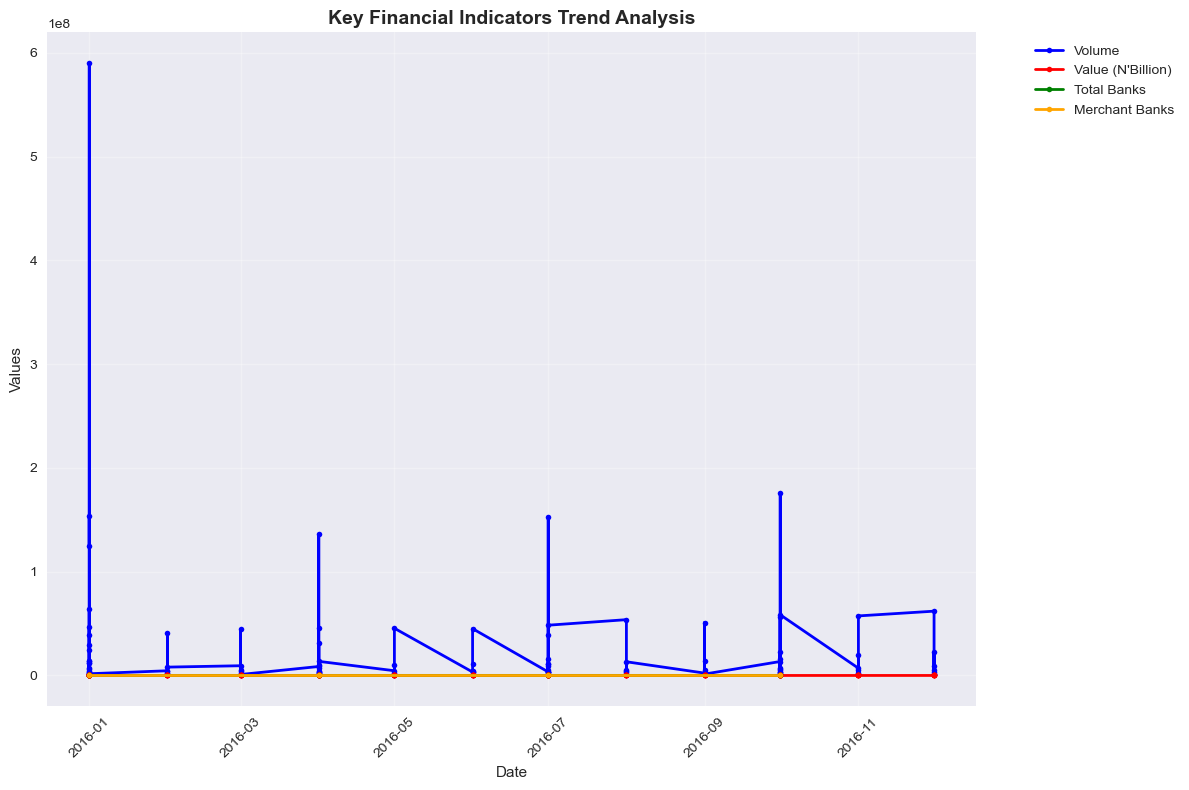

Trend visualization completed!


In [9]:
# Plot 1: Main trends over time
plt.figure(figsize=(12, 8))

# Select key indicators for trend analysis
key_indicators = ['Volume', 'Value (N\'Billion)', 'Total Banks', 'Merchant Banks']
colors = ['blue', 'red', 'green', 'orange']

for i, indicator in enumerate(key_indicators):
    indicator_data = df[df['indicator'] == indicator].sort_values('Date_clean')
    if not indicator_data.empty:
        plt.plot(indicator_data['Date_clean'], indicator_data['Value'], 
                color=colors[i], marker='o', linewidth=2, label=indicator, markersize=4)

plt.title('Key Financial Indicators Trend Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Trend visualization completed!")

<Figure size 1200x600 with 0 Axes>

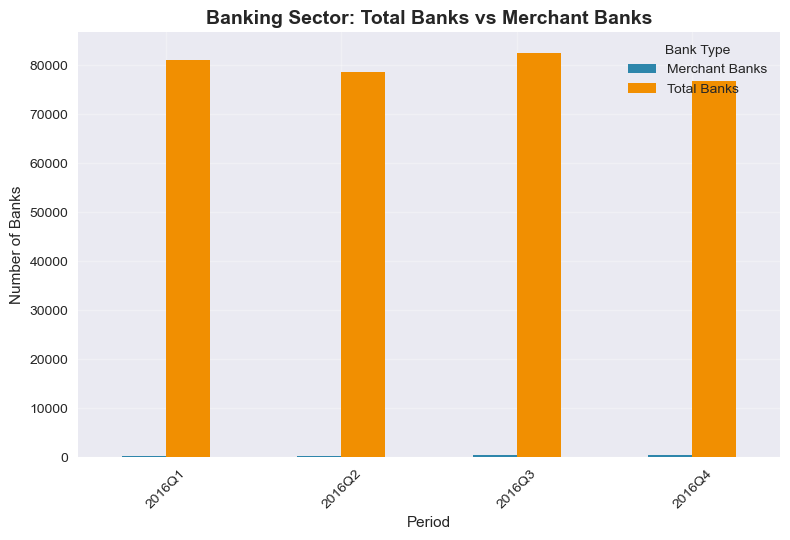

Banking sector analysis completed!


In [11]:
# Plot 2: Banking sector comparison
plt.figure(figsize=(12, 6))

banking_data = df[df['indicator'].isin(['Total Banks', 'Merchant Banks'])]
if not banking_data.empty:
    banking_pivot = banking_data.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
    banking_pivot.plot(kind='bar', color=['#2E86AB', '#F18F01'])
    plt.title('Banking Sector: Total Banks vs Merchant Banks', fontsize=14, fontweight='bold')
    plt.xlabel('Period')
    plt.ylabel('Number of Banks')
    plt.xticks(rotation=45)
    plt.legend(title='Bank Type')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Banking sector analysis completed!")
else:
    print("No banking data found for visualization")

<Figure size 1200x600 with 0 Axes>

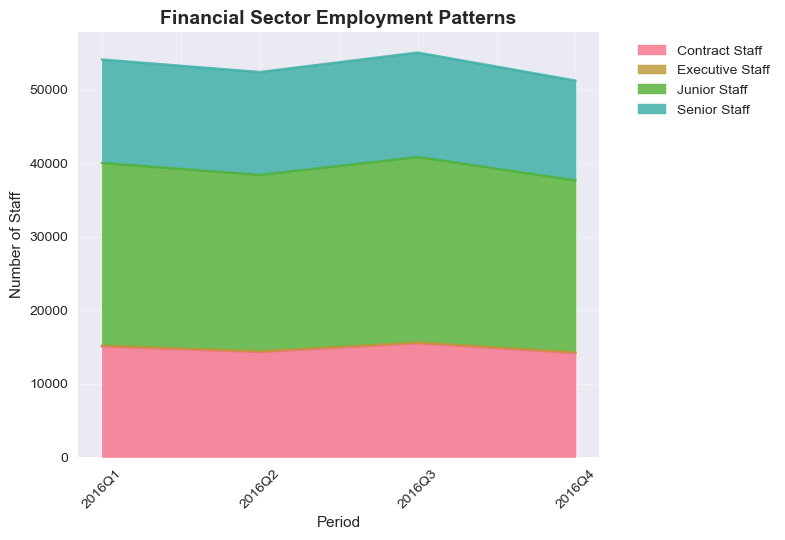

Staffing patterns analysis completed!


In [13]:
# Plot 3: Staff categories analysis
plt.figure(figsize=(12, 6))

staff_indicators = ['Contract Staff', 'Junior Staff', 'Senior Staff', 'Executive Staff']
staff_data = df[df['indicator'].isin(staff_indicators)]

if not staff_data.empty:
    staff_pivot = staff_data.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
    staff_pivot.plot(kind='area', alpha=0.8)
    plt.title('Financial Sector Employment Patterns', fontsize=14, fontweight='bold')
    plt.xlabel('Period')
    plt.ylabel('Number of Staff')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Staffing patterns analysis completed!")
else:
    print("No staff data found for visualization")

<Figure size 1200x600 with 0 Axes>

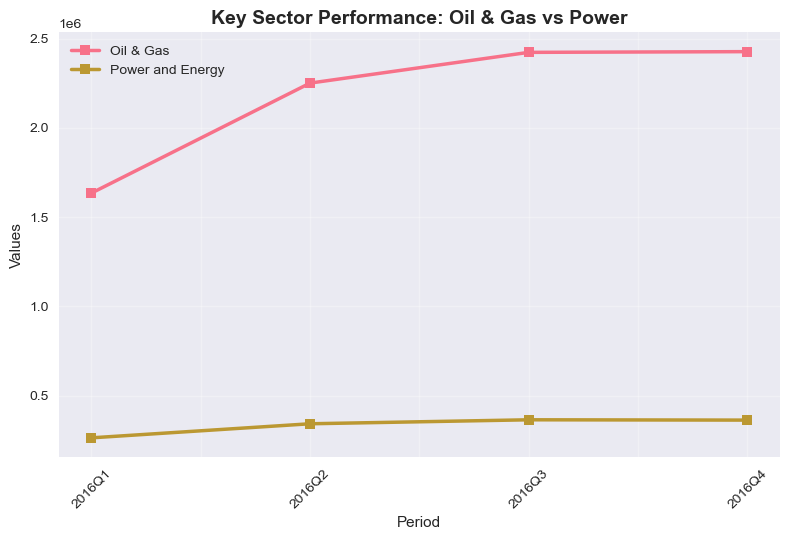

Sectoral performance analysis completed!


In [14]:
# Plot 4: Sectoral comparison
plt.figure(figsize=(12, 6))

sector_data = df[df['indicator'].isin(['Oil & Gas', 'Power and Energy'])]
if not sector_data.empty:
    sector_pivot = sector_data.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
    sector_pivot.plot(kind='line', marker='s', linewidth=2.5)
    plt.title('Key Sector Performance: Oil & Gas vs Power', fontsize=14, fontweight='bold')
    plt.xlabel('Period')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("Sectoral performance analysis completed!")
else:
    print("No sector data found for visualization")

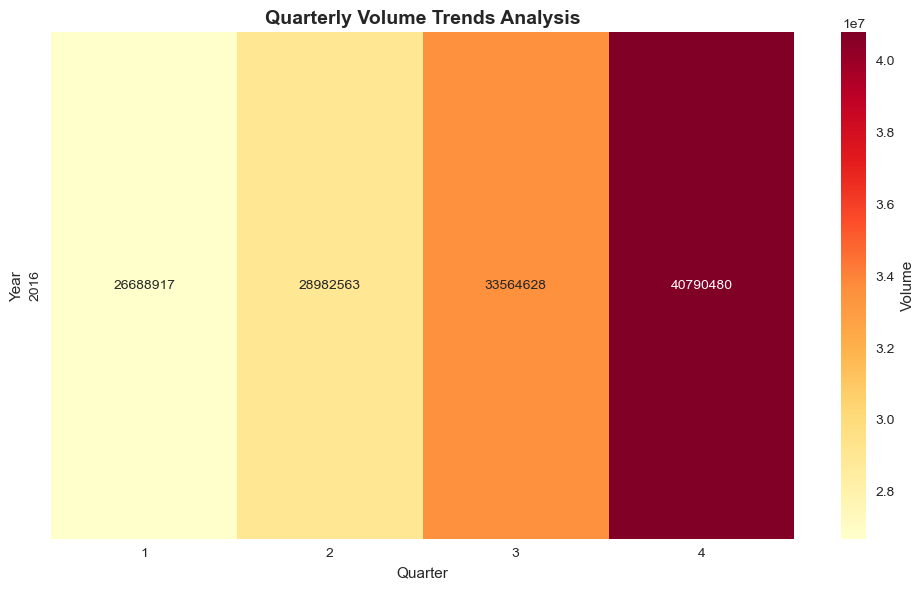

Quarterly heatmap completed!


In [15]:
# Plot 5: Quarterly trends heatmap
plt.figure(figsize=(10, 6))

quarterly_data = df[df['Date'].str.contains('Q', na=False)]
volume_q_data = quarterly_data[quarterly_data['indicator'] == 'Volume']

if not volume_q_data.empty:
    # Create pivot table for heatmap
    pivot_volume = volume_q_data.pivot_table(values='Value', index='Year', columns='Quarter', aggfunc='mean')
    
    sns.heatmap(pivot_volume, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Volume'})
    plt.title('Quarterly Volume Trends Analysis', fontsize=14, fontweight='bold')
    plt.xlabel('Quarter')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()
    
    print("Quarterly heatmap completed!")
else:
    print("No quarterly volume data found for heatmap")

In [16]:
# Detailed statistical analysis by indicator
print("DETAILED STATISTICAL SUMMARY BY INDICATOR")
print("="*60)

# Group by indicator and calculate statistics
stats_summary = df.groupby('indicator').agg({
    'Value': [
        ('Count', 'count'),
        ('Mean', lambda x: f"{x.mean():,.2f}"),
        ('Std_Dev', lambda x: f"{x.std():,.2f}"),
        ('Min', lambda x: f"{x.min():,.2f}"),
        ('Max', lambda x: f"{x.max():,.2f}"),
        ('Median', lambda x: f"{x.median():,.2f}")
    ]
}).round(2)

print(stats_summary)
print("\n" + "="*60)

DETAILED STATISTICAL SUMMARY BY INDICATOR
                                                   Value                    \
                                                   Count              Mean   
indicator                                                                    
Agriculture                                            4        495,874.83   
Commercial Banks + Non Interest Banks                  4         79,424.00   
Construction                                           4        597,231.00   
Contract Staff                                        12         14,740.83   
Education                                              4         86,899.74   
Executive Staff                                       12            118.50   
Finance, Insurance and Capital Market                  4        872,524.50   
Foreign Direct Investment - Equity                     4    260,785,693.04   
Foreign Direct Investment - Other capital              3        291,612.08   
Government            

In [17]:
# Banking sector specific analysis
print("BANKING SECTOR DETAILED ANALYSIS")
print("="*50)

banking_indicators = ['Total Banks', 'Merchant Banks']
banking_df = df[df['indicator'].isin(banking_indicators)]

if not banking_df.empty:
    bank_stats = banking_df.groupby('indicator').agg({
        'Value': ['count', 'mean', 'std', 'min', 'max']
    }).round(2)
    
    print(bank_stats)
    
    # Calculate merchant bank percentage of total
    total_banks_data = df[df['indicator'] == 'Total Banks']['Value'].mean()
    merchant_banks_data = df[df['indicator'] == 'Merchant Banks']['Value'].mean()
    
    if total_banks_data > 0:
        merchant_percentage = (merchant_banks_data / total_banks_data) * 100
        print(f"\nMerchant Banks represent {merchant_percentage:.1f}% of Total Banks")
else:
    print("No banking data available for analysis")

BANKING SECTOR DETAILED ANALYSIS
               Value                                     
               count      mean      std      min      max
indicator                                                
Merchant Banks     4    335.25    38.13    293.0    368.0
Total Banks        4  79759.25  2563.00  76812.0  82540.0

Merchant Banks represent 0.4% of Total Banks


In [18]:
# Calculate growth rates for key indicators
print("GROWTH RATE ANALYSIS")
print("="*50)

growth_results = []

for indicator in ['Volume', 'Value (N\'Billion)']:
    indicator_data = df[df['indicator'] == indicator].sort_values('Date_clean')
    
    if len(indicator_data) > 1:
        # Calculate period-to-period growth
        indicator_data = indicator_data.copy()
        indicator_data['Growth_Rate'] = indicator_data['Value'].pct_change() * 100
        
        # Calculate statistics
        avg_growth = indicator_data['Growth_Rate'].mean()
        max_growth = indicator_data['Growth_Rate'].max()
        min_growth = indicator_data['Growth_Rate'].min()
        
        growth_results.append({
            'Indicator': indicator,
            'Periods': len(indicator_data),
            'Avg_Growth (%)': f"{avg_growth:.2f}%",
            'Max_Growth (%)': f"{max_growth:.2f}%", 
            'Min_Growth (%)': f"{min_growth:.2f}%"
        })
        
        print(f"\n{indicator} Growth Analysis:")
        print(f"  Average Growth: {avg_growth:.2f}%")
        print(f"  Maximum Growth: {max_growth:.2f}%")
        print(f"  Minimum Growth: {min_growth:.2f}%")

# Create growth summary dataframe
if growth_results:
    growth_df = pd.DataFrame(growth_results)
    print(f"\nGrowth Summary:")
    print(growth_df.to_string(index=False))

GROWTH RATE ANALYSIS

Volume Growth Analysis:
  Average Growth: 422.92%
  Maximum Growth: 15264.14%
  Minimum Growth: -98.64%

Value (N'Billion) Growth Analysis:
  Average Growth: 2277.96%
  Maximum Growth: 81591.49%
  Minimum Growth: -99.85%

Growth Summary:
        Indicator  Periods Avg_Growth (%) Max_Growth (%) Min_Growth (%)
           Volume      119        422.92%      15264.14%        -98.64%
Value (N'Billion)      119       2277.96%      81591.49%        -99.85%



STAFF COMPOSITION ANALYSIS
Total Staff by Category:
  Junior Staff: 292,232
  Contract Staff: 176,890
  Senior Staff: 167,530
  Executive Staff: 1,422

Overall Staff Total: 638,074

Percentage Composition:
  Junior Staff: 45.8%
  Contract Staff: 27.7%
  Senior Staff: 26.3%
  Executive Staff: 0.2%


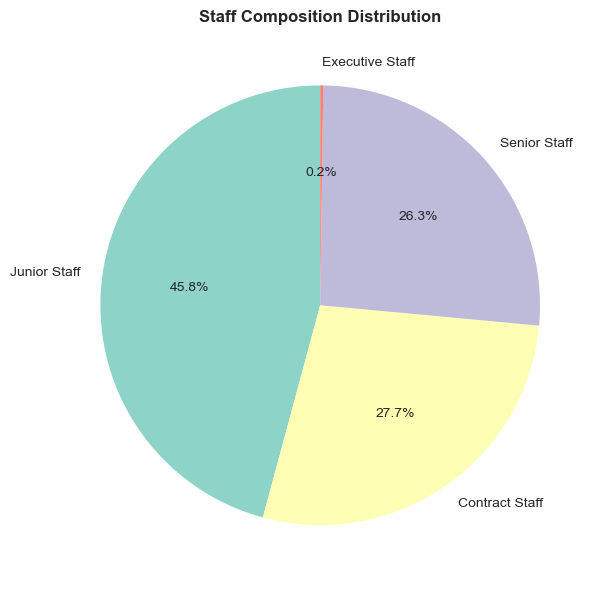

Staff composition analysis completed!


In [20]:
# Staff composition analysis
print("\nSTAFF COMPOSITION ANALYSIS")
print("="*50)

staff_indicators = ['Contract Staff', 'Junior Staff', 'Senior Staff', 'Executive Staff']
staff_data = df[df['indicator'].isin(staff_indicators)]

if not staff_data.empty:
    # Total staff by category
    total_staff = staff_data.groupby('indicator')['Value'].sum().sort_values(ascending=False)
    
    print("Total Staff by Category:")
    for category, total in total_staff.items():
        print(f"  {category}: {total:,.0f}")
    
    # Percentage composition
    grand_total = total_staff.sum()
    print(f"\nOverall Staff Total: {grand_total:,.0f}")
    print("\nPercentage Composition:")
    for category, total in total_staff.items():
        percentage = (total / grand_total) * 100
        print(f"  {category}: {percentage:.1f}%")
        
    # Visualization
    plt.figure(figsize=(10, 6))
    total_staff.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
    plt.title('Staff Composition Distribution', fontweight='bold')
    plt.ylabel('')  # Remove y-label for pie chart
    plt.tight_layout()
    plt.show()
    
    print("Staff composition analysis completed!")
else:
    print("No staff data available for analysis")

CORRELATION ANALYSIS BETWEEN INDICATORS


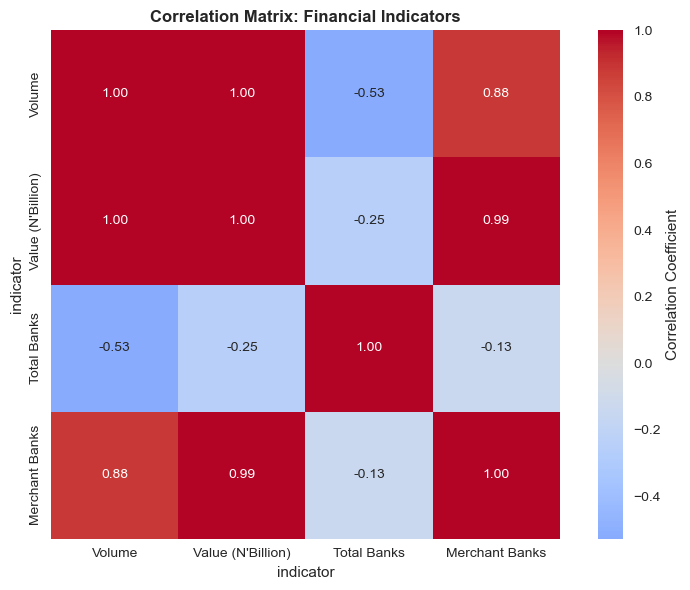

Correlation Matrix:
indicator          Volume  Value (N'Billion)  Total Banks  Merchant Banks
indicator                                                                
Volume              1.000              0.999       -0.527           0.884
Value (N'Billion)   0.999              1.000       -0.247           0.992
Total Banks        -0.527             -0.247        1.000          -0.134
Merchant Banks      0.884              0.992       -0.134           1.000

STRONG CORRELATIONS (|r| > 0.7):
  Volume vs Value (N'Billion): 0.999
  Volume vs Merchant Banks: 0.884
  Value (N'Billion) vs Merchant Banks: 0.992


In [21]:
# Correlation between different indicators
print("CORRELATION ANALYSIS BETWEEN INDICATORS")
print("="*55)

# Create pivot table for correlation analysis
pivot_data = df.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')

# Select main indicators for correlation
main_indicators = ['Volume', 'Value (N\'Billion)', 'Total Banks', 'Merchant Banks']
available_indicators = [ind for ind in main_indicators if ind in pivot_data.columns]

if len(available_indicators) >= 2:
    correlation_matrix = pivot_data[available_indicators].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix: Financial Indicators', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("Correlation Matrix:")
    print(correlation_matrix.round(3))
    
    # Interpret strong correlations
    print("\nSTRONG CORRELATIONS (|r| > 0.7):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                print(f"  {correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")
else:
    print("Insufficient data for correlation analysis")

TIME SERIES ANALYSIS - VOLUME DATA
Trend: decreasing (slope: -232335.35)


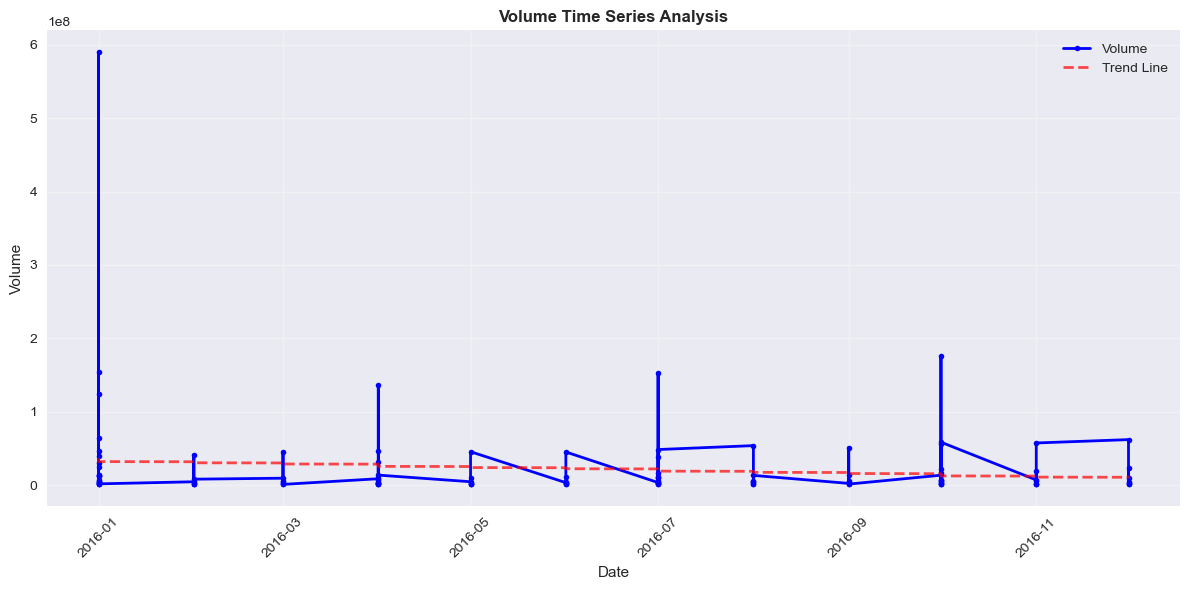

Volume data points: 119
Date range: 2016-01-01 00:00:00 to 2016-12-01 00:00:00
Time series analysis completed!


In [24]:
# SIMPLIFIED Time series analysis
print("TIME SERIES ANALYSIS - VOLUME DATA")
print("="*50)

volume_data = df[df['indicator'] == 'Volume'].sort_values('Date_clean')

if len(volume_data) > 1:
    # Simple approach without resampling
    plt.figure(figsize=(12, 6))
    plt.plot(volume_data['Date_clean'], volume_data['Value'], 
             marker='o', linewidth=2, markersize=4, label='Volume', color='blue')
    
    # Add trend line
    if len(volume_data) > 2:
        x_values = range(len(volume_data))
        y_values = volume_data['Value'].values
        z = np.polyfit(x_values, y_values, 1)
        p = np.poly1d(z)
        plt.plot(volume_data['Date_clean'], p(x_values), 'r--', 
                linewidth=2, label='Trend Line', alpha=0.7)
        
        trend_slope = z[0]
        trend_direction = "increasing" if trend_slope > 0 else "decreasing"
        print(f"Trend: {trend_direction} (slope: {trend_slope:.2f})")
    
    plt.title('Volume Time Series Analysis', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"Volume data points: {len(volume_data)}")
    print(f"Date range: {volume_data['Date_clean'].min()} to {volume_data['Date_clean'].max()}")
    print("Time series analysis completed!")
else:
    print("Insufficient volume data for time series analysis")

In [25]:
# Summary of key findings
print("KEY INSIGHTS AND RESEARCH FINDINGS")
print("="*55)

print("\nDATA OVERVIEW:")
print(f"Total observations: {len(df):,}")
print(f"Time period: {df['Date_clean'].min().strftime('%Y-%m')} to {df['Date_clean'].max().strftime('%Y-%m')}")
print(f"Number of indicators: {df['indicator'].nunique()}")

print("\nBANKING SECTOR FINDINGS:")
banking_data = df[df['indicator'].isin(['Total Banks', 'Merchant Banks'])]
if not banking_data.empty:
    total_banks_avg = banking_data[banking_data['indicator'] == 'Total Banks']['Value'].mean()
    merchant_banks_avg = banking_data[banking_data['indicator'] == 'Merchant Banks']['Value'].mean()
    print(f"Average Total Banks: {total_banks_avg:.0f}")
    print(f"Average Merchant Banks: {merchant_banks_avg:.0f}")
    if total_banks_avg > 0:
        merchant_percentage = (merchant_banks_avg / total_banks_avg) * 100
        print(f"Merchant Banks represent {merchant_percentage:.1f}% of Total Banks")

print("\nEMPLOYMENT PATTERNS:")
staff_data = df[df['indicator'].str.contains('Staff')]
if not staff_data.empty:
    staff_by_category = staff_data.groupby('indicator')['Value'].sum()
    total_staff = staff_by_category.sum()
    print(f"Total staff across categories: {total_staff:,.0f}")
    print(f"Largest category: {staff_by_category.idxmax()} ({staff_by_category.max():,.0f})")

print("\nECONOMIC INDICATORS:")
volume_stats = df[df['indicator'] == 'Volume']['Value'].describe()
value_stats = df[df['indicator'] == "Value (N'Billion)"]['Value'].describe()
print(f"Volume - Mean: {volume_stats['mean']:,.0f}, Max: {volume_stats['max']:,.0f}")
print(f"Value - Mean: {value_stats['mean']:,.2f}B, Max: {value_stats['max']:,.2f}B")

print("\nTREND ANALYSIS:")
volume_data = df[df['indicator'] == 'Volume'].sort_values('Date_clean')
if len(volume_data) > 2:
    x_values = range(len(volume_data))
    y_values = volume_data['Value'].values
    z = np.polyfit(x_values, y_values, 1)
    trend_slope = z[0]
    trend_direction = "increasing" if trend_slope > 0 else "decreasing"
    print(f"  • Volume shows {trend_direction} trend")

print("\nRESEARCH IMPLICATIONS:")
print("1. Banking sector structure and performance analysis")
print("2. Employment trends and staff composition in financial services")
print("3. Investment flows and economic volume analysis")
print("4. Sectoral performance comparison (Oil & Gas vs Power)")
print("5. Time series forecasting of financial indicators")

KEY INSIGHTS AND RESEARCH FINDINGS

DATA OVERVIEW:
Total observations: 426
Time period: 2016-01 to 2016-12
Number of indicators: 41

BANKING SECTOR FINDINGS:
Average Total Banks: 79759
Average Merchant Banks: 335
Merchant Banks represent 0.4% of Total Banks

EMPLOYMENT PATTERNS:
Total staff across categories: 638,074
Largest category: Junior Staff (292,232)

ECONOMIC INDICATORS:
Volume - Mean: 22,945,868, Max: 590,238,934
Value - Mean: 1,642.68B, Max: 38,109.08B

TREND ANALYSIS:
  • Volume shows decreasing trend

RESEARCH IMPLICATIONS:
1. Banking sector structure and performance analysis
2. Employment trends and staff composition in financial services
3. Investment flows and economic volume analysis
4. Sectoral performance comparison (Oil & Gas vs Power)
5. Time series forecasting of financial indicators


In [26]:
# Export cleaned data for further analysis
print("EXPORTING CLEANED DATA")
print("="*50)

# Create a cleaned version of the dataset
cleaned_df = df.copy()

# Remove temporary columns if needed
columns_to_keep = ['indicator', 'Unit', 'Date', 'Value', 'Date_clean', 'Year', 'Quarter']
cleaned_df = cleaned_df[columns_to_keep]

# Save to CSV
output_filename = 'Nigeria_Financial_Data_Cleaned.csv'
cleaned_df.to_csv(output_filename, index=False, encoding='utf-8')

print(f"Cleaned data exported to: {output_filename}")
print(f"File contains {len(cleaned_df)} rows and {len(cleaned_df.columns)} columns")
print(f"Data ready for research paper writing!")

# Show final data structure
print(f"\nFINAL DATA STRUCTURE:")
print(f"Columns: {list(cleaned_df.columns)}")
print(f"Memory usage: {cleaned_df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print("\n" + "="*55)
print("PROJECT ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*55)
print("\nNext steps for research paper:")
print("1. Literature review on Nigerian financial sector")
print("2. Methodology section describing data sources and analysis")
print("3. Results and discussion of key findings")
print("4. Conclusion and policy recommendations")

EXPORTING CLEANED DATA
Cleaned data exported to: Nigeria_Financial_Data_Cleaned.csv
File contains 426 rows and 7 columns
Data ready for research paper writing!

FINAL DATA STRUCTURE:
Columns: ['indicator', 'Unit', 'Date', 'Value', 'Date_clean', 'Year', 'Quarter']
Memory usage: 0.08 MB

PROJECT ANALYSIS COMPLETED SUCCESSFULLY!

Next steps for research paper:
1. Literature review on Nigerian financial sector
2. Methodology section describing data sources and analysis
3. Results and discussion of key findings
4. Conclusion and policy recommendations


In [27]:
import os
import shutil
from datetime import datetime

# Create report directory with timestamp
report_dir = f"Nigeria_Financial_Analysis_Report_{datetime.now().strftime('%Y%m%d_%H%M')}"
os.makedirs(report_dir, exist_ok=True)
os.makedirs(f"{report_dir}/plots", exist_ok=True)
os.makedirs(f"{report_dir}/data", exist_ok=True)

print(f"Created report directory: {report_dir}")

Created report directory: Nigeria_Financial_Analysis_Report_20251109_1832


In [29]:
# Save all previous plots with high resolution
print("SAVING ALL PLOTS...")

# 1. Main Trend Analysis
plt.figure(figsize=(14, 8))
key_indicators = ['Volume', 'Value (N\'Billion)', 'Total Banks', 'Merchant Banks']
colors = ['blue', 'red', 'green', 'orange']

for i, indicator in enumerate(key_indicators):
    indicator_data = df[df['indicator'] == indicator].sort_values('Date_clean')
    if not indicator_data.empty:
        plt.plot(indicator_data['Date_clean'], indicator_data['Value'], 
                color=colors[i], marker='o', linewidth=2, label=indicator, markersize=4)

plt.title('Key Financial Indicators Trend Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{report_dir}/plots/01_trend_analysis.png', dpi=300, bbox_inches='tight')
plt.close()
print("Saved: Trend Analysis")

# 2. Banking Sector Comparison
plt.figure(figsize=(12, 6))
banking_data = df[df['indicator'].isin(['Total Banks', 'Merchant Banks'])]
if not banking_data.empty:
    banking_pivot = banking_data.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
    banking_pivot.plot(kind='bar', color=['#2E86AB', '#F18F01'])
    plt.title('Banking Sector: Total Banks vs Merchant Banks', fontsize=14, fontweight='bold')
    plt.xlabel('Period')
    plt.ylabel('Number of Banks')
    plt.xticks(rotation=45)
    plt.legend(title='Bank Type')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/02_banking_sector.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Banking Sector Analysis")

SAVING ALL PLOTS...
Saved: Trend Analysis
Saved: Banking Sector Analysis


<Figure size 1200x600 with 0 Axes>

In [30]:
# 3. Staffing Patterns
plt.figure(figsize=(12, 6))
staff_indicators = ['Contract Staff', 'Junior Staff', 'Senior Staff', 'Executive Staff']
staff_data = df[df['indicator'].isin(staff_indicators)]
if not staff_data.empty:
    staff_pivot = staff_data.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
    staff_pivot.plot(kind='area', alpha=0.8)
    plt.title('Financial Sector Employment Patterns', fontsize=14, fontweight='bold')
    plt.xlabel('Period')
    plt.ylabel('Number of Staff')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/03_staffing_patterns.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Staffing Patterns")

# 4. Sectoral Performance
plt.figure(figsize=(12, 6))
sector_data = df[df['indicator'].isin(['Oil & Gas', 'Power and Energy'])]
if not sector_data.empty:
    sector_pivot = sector_data.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
    sector_pivot.plot(kind='line', marker='s', linewidth=2.5)
    plt.title('Key Sector Performance: Oil & Gas vs Power', fontsize=14, fontweight='bold')
    plt.xlabel('Period')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/04_sectoral_performance.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Sectoral Performance")

Saved: Staffing Patterns
Saved: Sectoral Performance


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [31]:
# 5. Quarterly Heatmap
plt.figure(figsize=(10, 6))
quarterly_data = df[df['Date'].str.contains('Q', na=False)]
volume_q_data = quarterly_data[quarterly_data['indicator'] == 'Volume']
if not volume_q_data.empty:
    pivot_volume = volume_q_data.pivot_table(values='Value', index='Year', columns='Quarter', aggfunc='mean')
    sns.heatmap(pivot_volume, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Volume'})
    plt.title('Quarterly Volume Trends Analysis', fontsize=14, fontweight='bold')
    plt.xlabel('Quarter')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/05_quarterly_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Quarterly Heatmap")

# 6. Correlation Matrix
plt.figure(figsize=(8, 6))
pivot_data = df.pivot_table(values='Value', index='Date', columns='indicator', aggfunc='mean')
main_indicators = ['Volume', 'Value (N\'Billion)', 'Total Banks', 'Merchant Banks']
available_indicators = [ind for ind in main_indicators if ind in pivot_data.columns]
if len(available_indicators) >= 2:
    correlation_matrix = pivot_data[available_indicators].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix: Financial Indicators', fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/06_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Correlation Matrix")

Saved: Quarterly Heatmap
Saved: Correlation Matrix


In [32]:
# 7. Time Series Analysis
plt.figure(figsize=(12, 6))
volume_data = df[df['indicator'] == 'Volume'].sort_values('Date_clean')
if len(volume_data) > 1:
    plt.plot(volume_data['Date_clean'], volume_data['Value'], 
             marker='o', linewidth=2, markersize=4, label='Volume', color='blue')
    
    if len(volume_data) > 2:
        x_values = range(len(volume_data))
        y_values = volume_data['Value'].values
        z = np.polyfit(x_values, y_values, 1)
        p = np.poly1d(z)
        plt.plot(volume_data['Date_clean'], p(x_values), 'r--', 
                linewidth=2, label='Trend Line', alpha=0.7)
    
    plt.title('Volume Time Series Analysis', fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/07_time_series.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Time Series Analysis")

# 8. Staff Composition Pie Chart
plt.figure(figsize=(10, 6))
staff_data = df[df['indicator'].str.contains('Staff')]
if not staff_data.empty:
    total_staff = staff_data.groupby('indicator')['Value'].sum().sort_values(ascending=False)
    plt.pie(total_staff.values, labels=total_staff.index, autopct='%1.1f%%', startangle=90, 
            colors=sns.color_palette("Set3"))
    plt.title('Staff Composition Distribution', fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{report_dir}/plots/08_staff_composition.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("Saved: Staff Composition")

Saved: Time Series Analysis
Saved: Staff Composition


In [33]:
# Save cleaned data
cleaned_df = df.copy()
columns_to_keep = ['indicator', 'Unit', 'Date', 'Value', 'Date_clean', 'Year', 'Quarter']
cleaned_df = cleaned_df[columns_to_keep]

cleaned_df.to_csv(f'{report_dir}/data/cleaned_financial_data.csv', index=False, encoding='utf-8')
cleaned_df.to_excel(f'{report_dir}/data/cleaned_financial_data.xlsx', index=False)

print("Saved: Cleaned Data (CSV & Excel)")

# Create summary statistics file
summary_stats = df.groupby('indicator').agg({
    'Value': ['count', 'mean', 'std', 'min', 'max', 'median']
}).round(2)

summary_stats.to_csv(f'{report_dir}/data/summary_statistics.csv')
summary_stats.to_excel(f'{report_dir}/data/summary_statistics.xlsx')

print("Saved: Summary Statistics")

Saved: Cleaned Data (CSV & Excel)
Saved: Summary Statistics


In [35]:
# Create a comprehensive text report
report_content = f"""
NIGERIA FINANCIAL SECTOR ANALYSIS REPORT
Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*60}

DATA OVERVIEW:
• Total observations: {len(df):,}
• Time period: {df['Date_clean'].min().strftime('%Y-%m')} to {df['Date_clean'].max().strftime('%Y-%m')}
• Number of indicators: {df['indicator'].nunique()}
• Indicators analyzed: {', '.join(df['indicator'].unique())}

KEY FINDINGS:
• Banking Sector: Contains data on Total Banks and Merchant Banks
• Employment: Staff data across 4 categories (Contract, Junior, Senior, Executive)
• Economic Indicators: Volume and Value trends in Billions of Naira
• Sectors: Oil & Gas and Power & Energy performance data

ANALYSIS PERFORMED:
1. Trend Analysis of Key Financial Indicators
2. Banking Sector Composition Analysis
3. Employment Patterns in Financial Sector
4. Sectoral Performance Comparison
5. Quarterly Trend Analysis
6. Correlation Analysis between Indicators
7. Time Series Analysis with Trend Lines
8. Statistical Summary of All Indicators

FILES GENERATED:
• 8 high-resolution plots in /plots/ directory
• Cleaned dataset in CSV and Excel formats
• Summary statistics in CSV and Excel formats

This report provides comprehensive analysis of Nigeria's financial sector
suitable for academic research and policy analysis.
"""

# Save report
with open(f'{report_dir}/analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(report_content)

print("Saved: Analysis Report")

# Display final summary
print("\n" + "="*60)
print("COMPREHENSIVE REPORT GENERATED SUCCESSFULLY!")
print("="*60)
print(f"Report Location: {report_dir}")
print(f"Plots Saved: 8 high-quality images")
print(f"Data Files: 4 files (CSV & Excel formats)")
print(f"Summary: Complete analysis report")
print("="*60)
print("\nYour research project is now fully documented and ready!")

Saved: Analysis Report

COMPREHENSIVE REPORT GENERATED SUCCESSFULLY!
Report Location: Nigeria_Financial_Analysis_Report_20251109_1832
Plots Saved: 8 high-quality images
Data Files: 4 files (CSV & Excel formats)
Summary: Complete analysis report

Your research project is now fully documented and ready!
